# **Business Understanding**



### **Context**

Industri ritel, khususnya sektor supermarket, mengalami pergeseran yang signifikan karena perubahan perilaku dan preferensi konsumen. Dengan daya beli masyarakat yang menurun, supermarket menghadapi tantangan dalam mempertahankan dan menarik pelanggan. Memahami perilaku dan preferensi pelanggan sangat penting bagi supermarket untuk tetap kompetitif di pasar dan memastikan kepuasan pelanggan.

### **Problem Statement**

Supermarket ini menghadapi penurunan retensi pelanggan dan peningkatan tingkat pengabaian keranjang belanja. Hal ini menyebabkan penurunan penjualan dan kepuasan pelanggan secara keseluruhan. Memahami pendorong utama perilaku dan preferensi pelanggan sangat penting untuk meningkatkan retensi pelanggan, meningkatkan penjualan, dan meningkatkan pengalaman pelanggan secara keseluruhan. Supermarket ini berusaha menghadapi persaingan dengan menciptakan hybrid transactions dimana pelanggan dapat berbelanja dengan pergi ke toko maupun beli di web dapat dilakukan sekaligus.

### **Goals**

- Mengurangi tingkat pengabaian keranjang belanja sebesar 20% di kuartal berikutnya.
- Mengidentifikasi segmen pelanggan dengan potensi tertinggi untuk peluang upselling (Diskon (Online) ) dan cross-selling<br>(Gratis Barang (Offline) ).

### **Analytical Aproach**

- Segmentasi Pelanggan: <br>Memanfaatkan algoritme pengelompokan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian, demografi, dan preferensi mereka. Hal ini akan memungkinkan identifikasi kelompok pelanggan yang berbeda dengan kebutuhan dan preferensi tertentu.
- Analisis Keranjang Pasar: <br>Menganalisis pola pembelian pelanggan untuk mengidentifikasi produk yang sering dibeli bersama. Hal ini akan membantu dalam menciptakan bundel produk dan promosi yang ditargetkan untuk mendorong penjualan silang dan meningkatkan nilai transaksi rata-rata.

### **Business Metrics**

- Tingkat Retensi Pelanggan: <br>Persentase pelanggan yang dipertahankan selama periode tertentu.
- Tingkat Pengabaian Keranjang Belanja: <br>Persentase keranjang belanja yang ditinggalkan dibandingkan dengan jumlah total transaksi yang dilakukan.
- Nilai Transaksi Rata-rata: <br>Jumlah rata-rata yang dibelanjakan oleh pelanggan per transaksi.
Dengan berfokus pada area dan metrik utama ini, supermarket dapat lebih memahami pelanggannya, meningkatkan retensi pelanggan, dan meningkatkan pengalaman berbelanja secara keseluruhan, yang mengarah pada peningkatan penjualan dan loyalitas pelanggan.

The dataset contains `2240 samples`. Contains `29 features` :

**Accepted/Responses Campaign**

| Feature               | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| AcceptedCmp1          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response (target)     | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain              | 1 if customer complained in the previous 2 years            |

**Customer Information**

| Feature               | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| ID                    | Customer's id                                                |
| Year_Birth            | Customer's year of birth                                     |
| Education             | Customer’s level of education                                |
| Marital_Status        | Customer’s marital status                                    |
| Kidhome               | Number of small children in customer’s household            |
| Teenhome              | Number of teenagers in customer’s household                 |
| Income                | Customer’s yearly household income                          |
| Dt_Customer           | Date of customer’s enrolment with the company               |
| Recency               | Number of days since the last purchase                       |

**Sales Product Type**

| Feature               | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| MntFishProducts       | Amount spent on fish products in the last 2 years            |
| MntMeatProducts       | Amount spent on meat products in the last 2 years            |
| MntFruits             | Amount spent on fruits products in the last 2 years          |
| MntSweetProducts      | Amount spent on sweet products in the last 2 years           |
| MntWines              | Amount spent on wine products in the last 2 years            |
| MntGoldProds          | Amount spent on gold products in the last 2 years            |


**Number of Purchases per Type**

| Feature               | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| NumDealsPurchases     | Number of purchases made with discount                       |
| NumCatalogPurchases   | Number of purchases made using the catalogue                |
| NumStorePurchases     | Number of purchases made directly in stores                 |
| NumWebPurchases       | Number of purchases made through the company’s website      |
| NumWebVisitsMonth     | Number of visits to the company’s website in the last month  |

**Cost and Revenue**

| Feature               | Description                                                  |
|-----------------------|--------------------------------------------------------------|
| Z_CostContact         | Cost to contact a customer                                   |
| Z_Revenue             | Revenue after client accepting campaign                      |

# **Data Collection**

In [1]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 90)

# Read in the data
df = pd.read_csv('../src/data/clean/Supermarket Customers.csv')

# **Data Preparation**

## Data Understanding

In [2]:
df.describe()

,id,yearbirth,age,income,kidhome,teenhome,totalchild,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldproducts,mnttotal,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,totalpurchases,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,complain,response,totalacceptedcmp
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,12706.561071,1968.879319,46.120681,51719.363504,0.445255,0.509002,0.954258,48.998054,302.449148,21.630657,151.071533,31.876886,21.915328,39.329927,568.273479,2.225304,4.071046,2.622871,5.773236,5.299270,14.692457,0.065693,0.012652,0.072993,0.076886,0.072019,0.009732,0.151338,0.451582
std,962.083464,11.657980,11.657980,20556.318022,0.537581,0.546558,0.748806,28.989942,331.367511,27.195590,179.530341,40.186480,27.551698,39.785074,546.558119,1.538959,2.650130,2.731290,3.240170,2.355973,7.451683,0.247806,0.111795,0.260188,0.266475,0.258583,0.098195,0.358465,0.891082
min,10001.000000,1940.000000,19.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12291.500000,1959.000000,38.000000,35702.500000,0.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12860.000000,1970.000000,45.000000,51651.000000,0.000000,0.000000,1.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,395.000000,2.000000,4.000000,2.000000,5.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13431.500000,1977.000000,56.000000,67902.000000,1.000000,1.000000,1.000000,74.000000,504.500000,33.000000,230.000000,50.000000,34.000000,56.000000,989.000000,3.000000,6.000000,4.000000,8.000000,7.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,14000.000000,1996.000000,75.000000,113734.000000,2.000000,2.000000,3.000000,99.000000,1224.000000,81.000000,555.000000,120.000000,81.000000,126.000000,2097.000000,6.000000,11.000000,10.000000,13.000000,13.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [3]:
df.columns

Index(['id', 'yearbirth', 'age', 'categorical_age', 'education',
       'maritalstatus', 'income', 'categorical_income', 'kidhome', 'teenhome',
       'totalchild', 'dtcustomer', 'recency', 'mntwines', 'mntwines_category',
       'mntfruits', 'mntfruits_category', 'mntmeatproducts',
       'mntmeatproducts_category', 'mntfishproducts',
       'mntfishproducts_category', 'mntsweetproducts',
       'mntsweetproducts_category', 'mntgoldproducts',
       'mntgoldproducts_category', 'mnttotal', 'numdealspurchases',
       'numdealspurchases_category', 'numwebpurchases',
       'numwebpurchases_category', 'numcatalogpurchases',
       'numcatalogpurchases_category', 'numstorepurchases',
       'numstorepurchases_category', 'numwebvisitsmonth',
       'numwebvisitsmonth_category', 'totalpurchases', 'acceptedcmp1',
       'acceptedcmp1_category', 'acceptedcmp2', 'acceptedcmp2_category',
       'acceptedcmp3', 'acceptedcmp3_category', 'acceptedcmp4',
       'acceptedcmp4_category', 'acceptedcmp

In [4]:
# show data description
print(f"Jumlah Baris,Kolom : {df.shape}")
cols = ['id', 'yearbirth', 'age', 'categorical_age', 'education',
       'maritalstatus', 'income', 'categorical_income', 'kidhome', 'teenhome',
       'totalchild', 'dtcustomer', 'recency', 'mntwines', 'mntwines_category',
       'mntfruits', 'mntfruits_category', 'mntmeatproducts',
       'mntmeatproducts_category', 'mntfishproducts',
       'mntfishproducts_category', 'mntsweetproducts',
       'mntsweetproducts_category', 'mntgoldproducts',
       'mntgoldproducts_category', 'mnttotal', 'numdealspurchases',
       'numdealspurchases_category', 'numwebpurchases',
       'numwebpurchases_category', 'numcatalogpurchases',
       'numcatalogpurchases_category', 'numstorepurchases',
       'numstorepurchases_category', 'numwebvisitsmonth',
       'numwebvisitsmonth_category', 'totalpurchases', 'acceptedcmp1',
       'acceptedcmp1_category', 'acceptedcmp2', 'acceptedcmp2_category',
       'acceptedcmp3', 'acceptedcmp3_category', 'acceptedcmp4',
       'acceptedcmp4_category', 'acceptedcmp5', 'acceptedcmp5_category',
       'complain', 'response', 'response_category', 'totalacceptedcmp']
pd.DataFrame({
    'data_type': df[cols].dtypes.values,
    'null_value': df[cols].isna().sum(),
    'Percentange': df[cols].isna().mean().values * 100,
    'n_unique': df[cols].nunique().values,
    'sample_unique': [df[col].unique() for col in cols]}
)

Jumlah Baris,Kolom : (2055, 51)


,data_type,null_value,Percentange,n_unique,sample_unique
id,int64,0,0.0,2055,"[13656, 13046, 12749, 13161, 13752, 13166, 12773, 12156, 12674, 13512, 13577, 12710, 1..."
yearbirth,int64,0,0.0,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1..."
age,int64,0,0.0,56,"[58, 61, 50, 31, 34, 48, 44, 30, 41, 65, 32, 39, 56, 63, 28, 69, 35, 66, 33, 36, 64, 4..."
categorical_age,object,0,0.0,3,"[56-90, 36-55, 0-35]"
education,object,0,0.0,4,"[Graduation, PhD, Master, Basic]"
maritalstatus,object,0,0.0,2,"[Single, Partner]"
income,float64,0,0.0,1970,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648..."
categorical_income,object,0,0.0,4,"[High, Low, Highest, Lowest]"
kidhome,int64,0,0.0,3,"[0, 1, 2]"
teenhome,int64,0,0.0,3,"[0, 1, 2]"


In [5]:
df.dtypes

id                                int64
yearbirth                         int64
age                               int64
categorical_age                  object
education                        object
maritalstatus                    object
income                          float64
categorical_income               object
kidhome                           int64
teenhome                          int64
totalchild                        int64
dtcustomer                       object
recency                           int64
mntwines                          int64
mntwines_category                object
mntfruits                         int64
mntfruits_category               object
mntmeatproducts                   int64
mntmeatproducts_category         object
mntfishproducts                   int64
mntfishproducts_category         object
mntsweetproducts                  int64
mntsweetproducts_category        object
mntgoldproducts                   int64
mntgoldproducts_category         object


## Data Cleaning

Data Cleaning dilakukan untuk mengatasi data yang tidak konsisten, duplikat, dan missing value.<br><br>
Data Cleaning Sudah dilakukan di file `"Cleaning.ipynb"`

## Check Distribution Data

In [6]:
df_num = df.select_dtypes(include=['int64', 'float64'])
print(len(df_num.columns))
df_num.columns

29


Index(['id', 'yearbirth', 'age', 'income', 'kidhome', 'teenhome', 'totalchild',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldproducts', 'mnttotal',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'totalpurchases',
       'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'complain', 'response', 'totalacceptedcmp'],
      dtype='object')

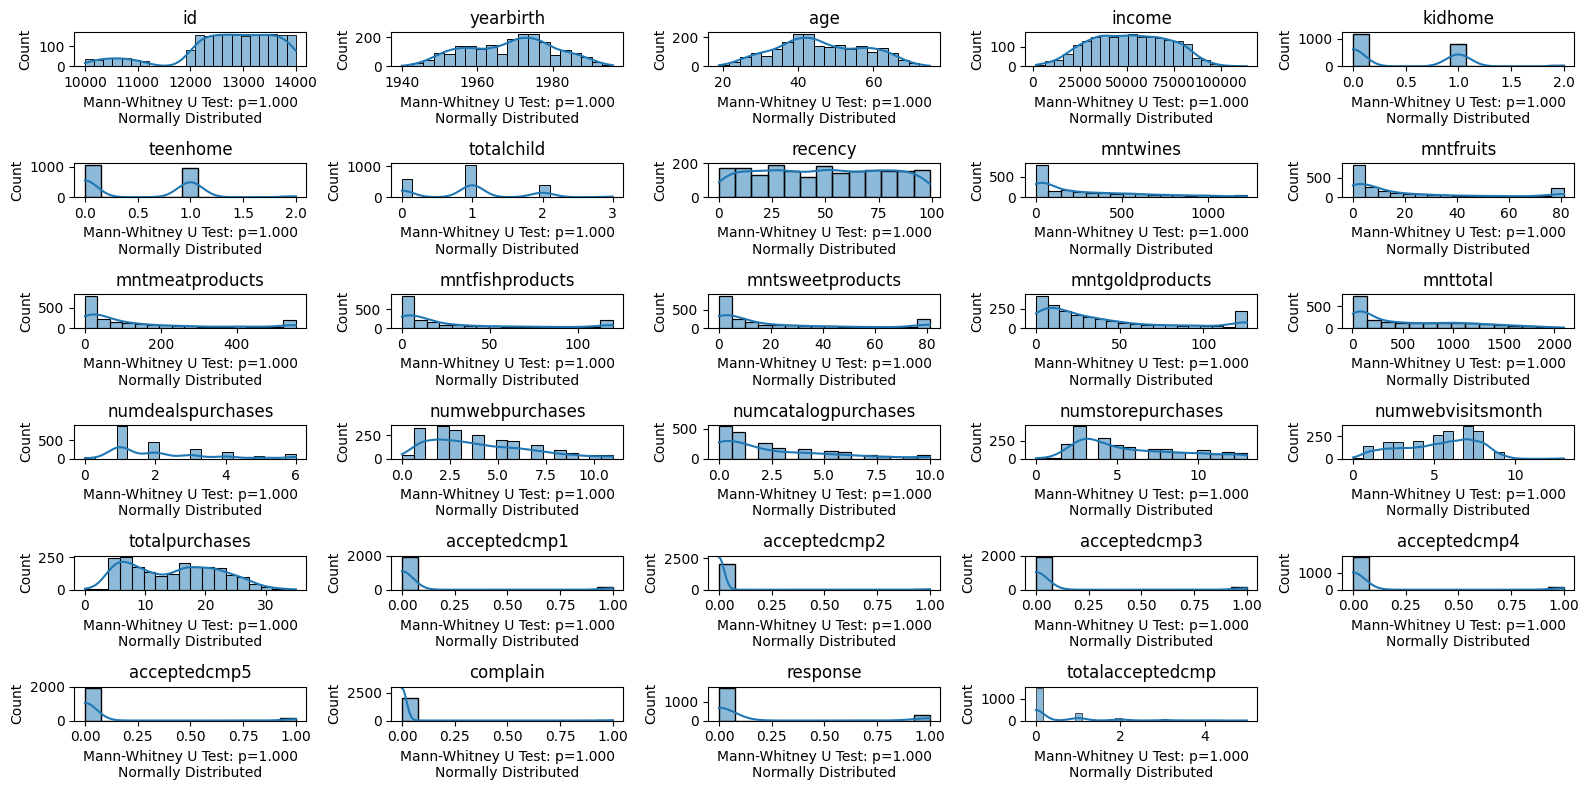

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Assuming 'df' is your DataFrame
columns = ['id', 'yearbirth', 'age', 'income', 'kidhome', 'teenhome', 'totalchild',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldproducts', 'mnttotal',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'totalpurchases',
       'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'complain', 'response', 'totalacceptedcmp']

# Create a subplot grid
fig, axes = plt.subplots(6, 5, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Perform the Mann-Whitney U test for each column and create histograms
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, label=column, ax=ax)
    ax.set_title(column)

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(df[column], df[column])

    if p > 0.05:
        ax.set_xlabel(
            f"Mann-Whitney U Test: p={p:.3f}\nNormally Distributed")
    else:
        ax.set_xlabel(
            f"Mann-Whitney U Test: p={p:.3f}\nNot Normally Distributed")

# Remove any empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **DATA ANALYSIS**   

### **Correlation Matriks**

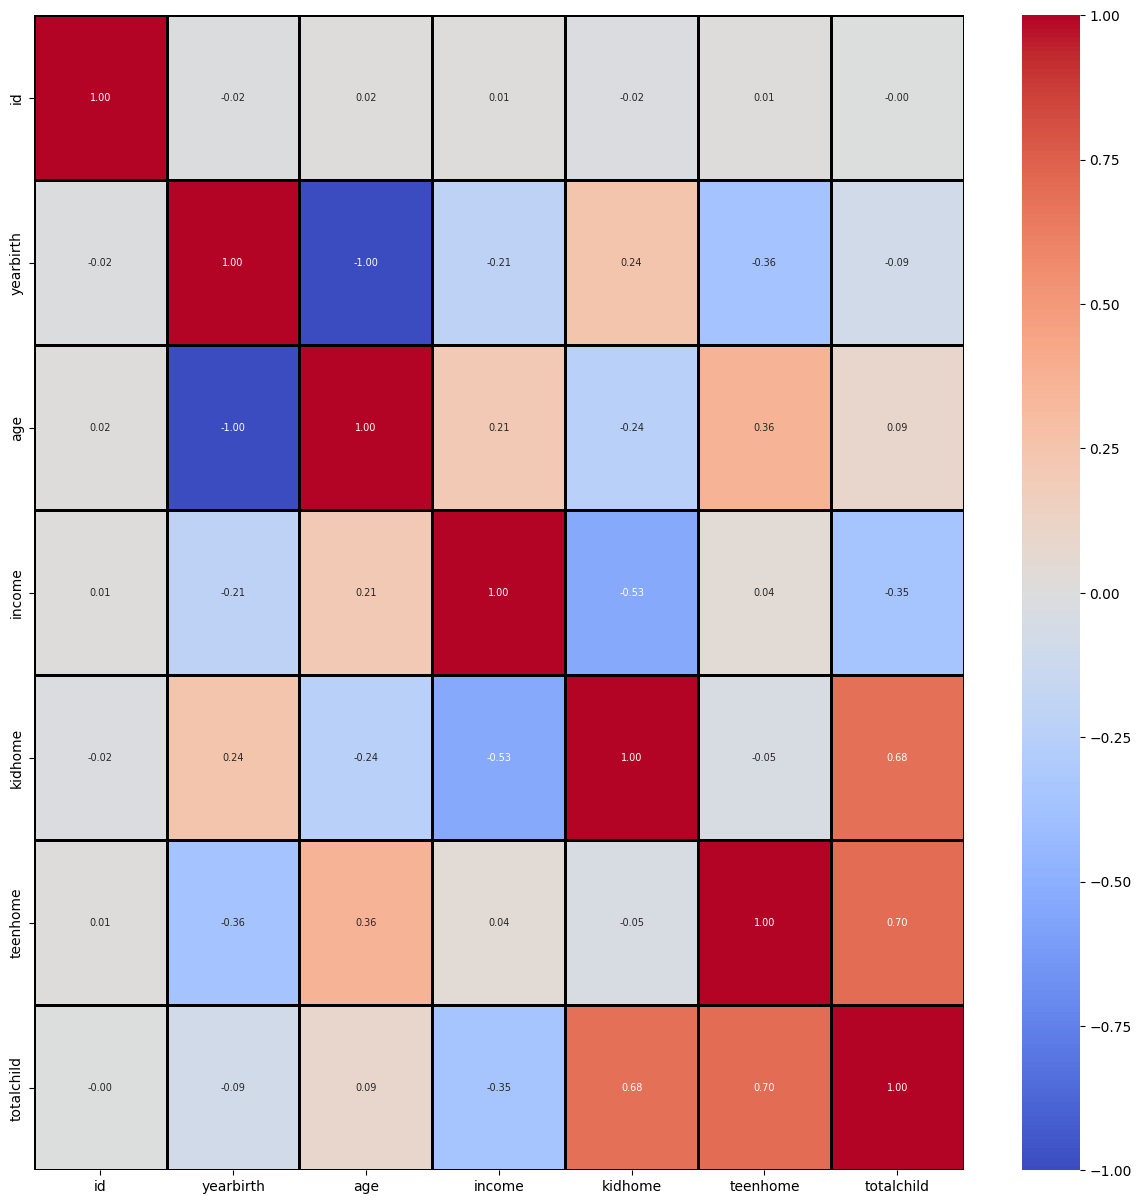

In [8]:
# Get Data With Numeric Type
df_num = df.select_dtypes(include=['int64', 'float64'])

# Get Only Some Column
df_corr = df_num.iloc[:, 0:7]

# Print Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', annot_kws={"size":7} )
plt.show()

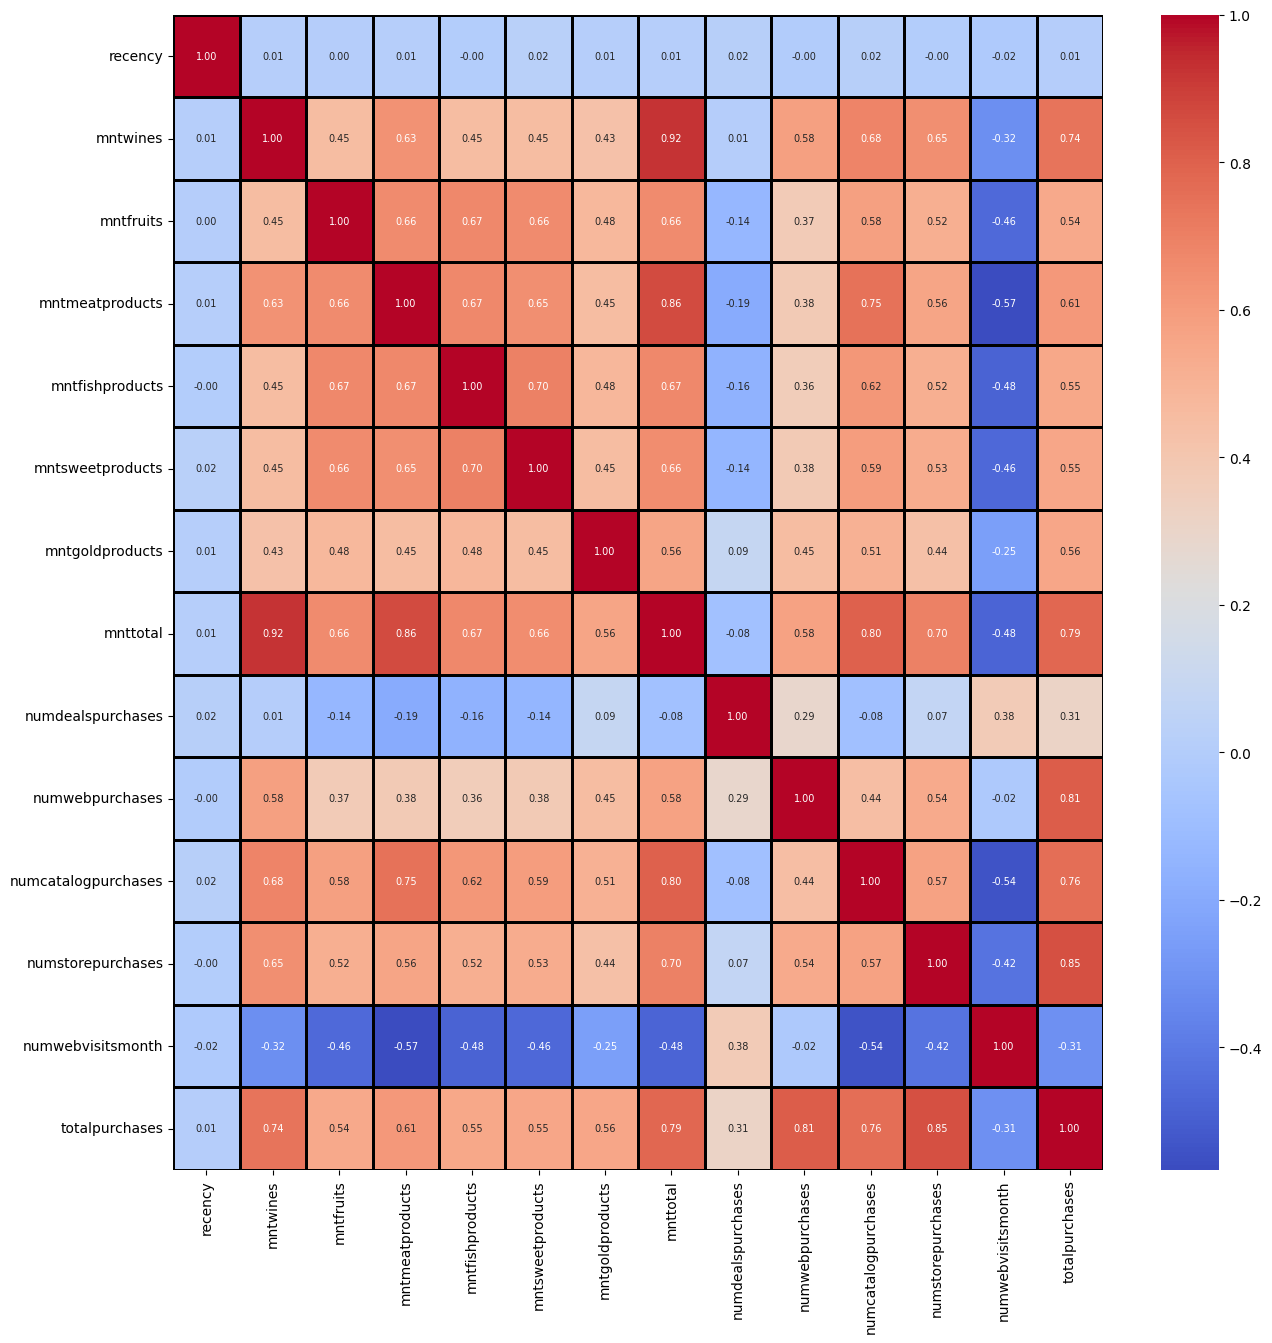

In [9]:
# Get Data With Numeric Type
df_num = df.select_dtypes(include=['int64', 'float64'])

# Get Only Some Column
df_corr = df_num.iloc[:, 7:21]

# Print Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', annot_kws={"size":7} )
plt.show()

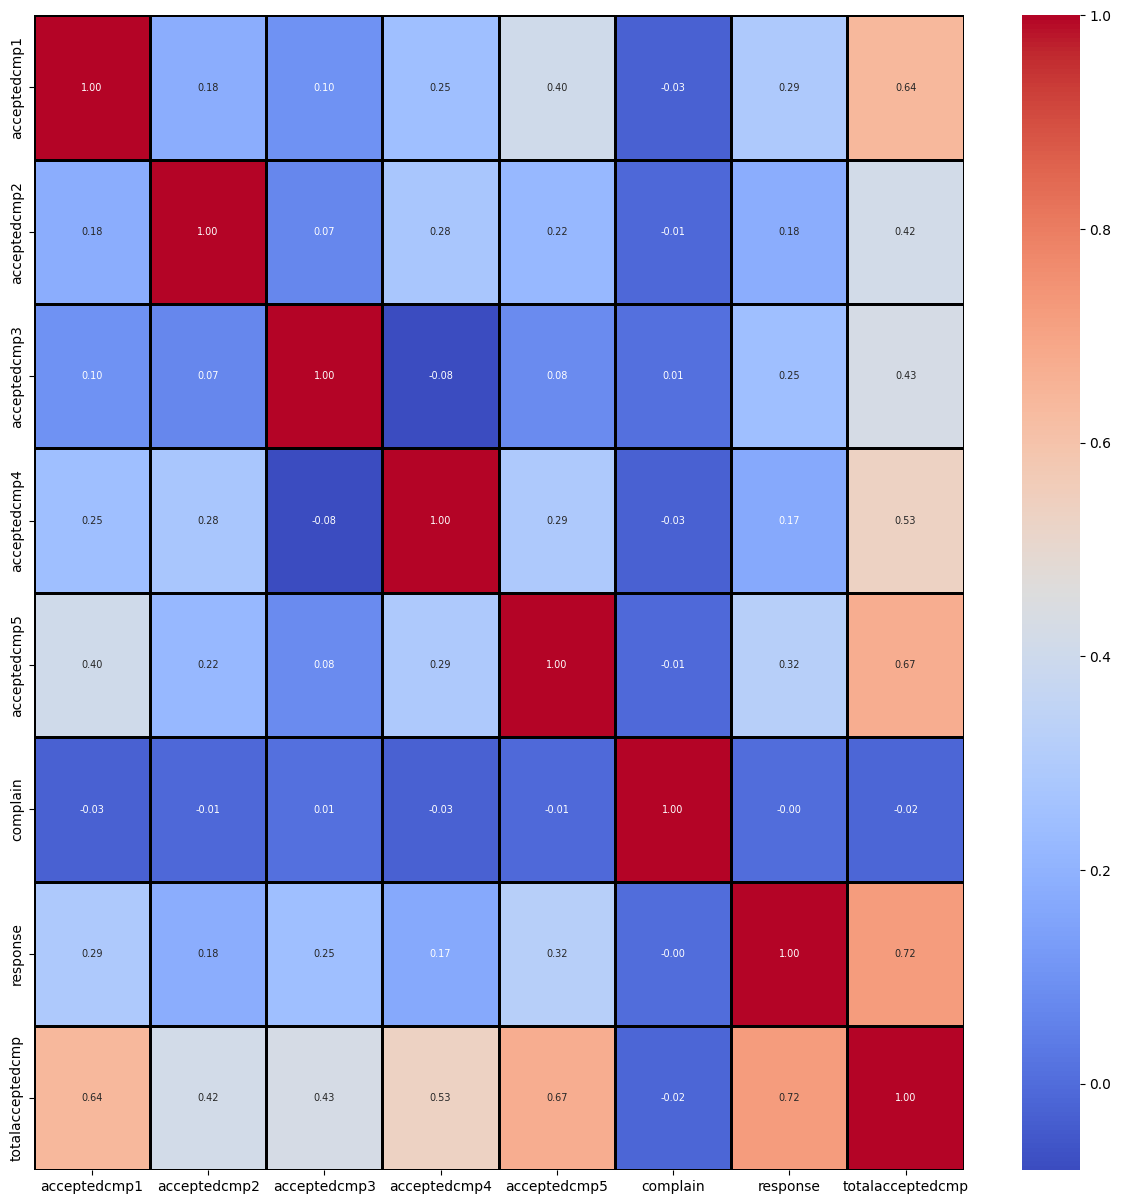

In [10]:
# Get Data With Numeric Type
df_num = df.select_dtypes(include=['int64', 'float64'])

# Get Only Some Column
df_corr = df_num.iloc[:, 21:29]

# Print Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', annot_kws={"size":7} )
plt.show()

### _**Segmentation Costumer (RFM) Analysis**_
I Will Scale Between 1-5 For Each Column
- Recency With Column "recency"
- Frequency With Column "totalpurchases" (Will be added later)
- Monetary With Column "mnttotal" (Will be added later)

I Get The RFM Categorical From The Reference [Here](https://www.putler.com/rfm-analysis/)    

- `totalpurchases_category`

In [11]:
# add new column totalpurchases_category based on totalpurchases
df.insert(37, 'totalpurchases_category', pd.cut(df['totalpurchases'], bins=[-np.inf, 5, 10, 17, 25, 40], labels=[1, 2, 3, 4, 5]))

- `recency_category`  

In [12]:
# add new column recency_category based on recency
df.insert(13, 'recency_category', pd.cut(df['recency'], bins=[-np.inf, 10, 25, 50, 75, 100], labels=[5, 4, 3, 2, 1]))

- `mnttotal_category`

In [13]:
# add new column mnttotal_category based on mnttotal
df.insert(27, 'mnttotal_category', pd.cut(df['mnttotal'], bins=[-np.inf, 100, 500, 900, 1300, 2200], labels=[1, 2, 3, 4, 5]))

- `behaviour_score`

In [14]:
# add new column behaviour_score based on receny_category, totalpurchases_category, mnttotal_category
# for example if recency_category = 1, totalpurchases_category = 3, mnttotal_category = 3 then behaviour_score = 133

df.insert(40, 'behaviour_score', df['recency_category'].astype(str) + df['totalpurchases_category'].astype(str) + df['mnttotal_category'].astype(str))

- `behaviour_category`

I will use this picture as reference for the RFM Categorical

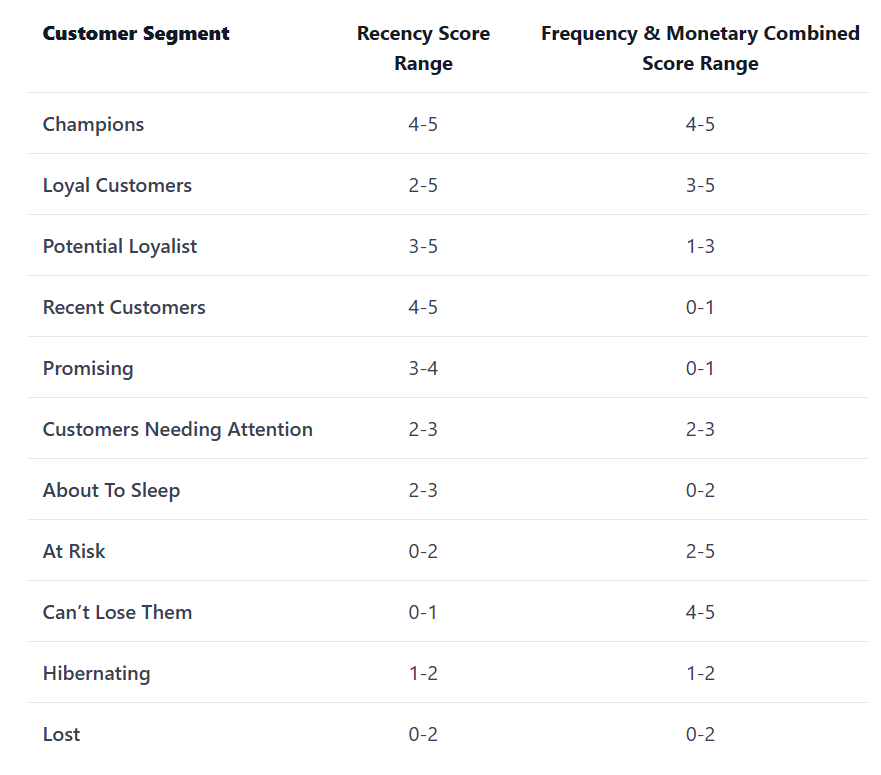

In [15]:
# add new column behaviour_category based on behaviour_score

df.insert(41, 'behaviour_category', df['behaviour_score'].replace({
    '555': 'Champions','554': 'Champions','553': 'Loyal Customer','552': 'Loyal Customer','551': 'Potential Loyalist',
    '545': 'Champions','544': 'Loyal Customer','543': 'Loyal Customer','542': 'Potential Loyalist','541': 'Potential Loyalist',
    '535': 'Loyal Customer','534': 'Loyal Customer','533': 'Potential Loyalist','532': 'Potential Loyalist','531': 'Potential Loyalist',
    '525': 'Loyal Customer','524': 'Potential Loyalist','523': 'Potential Loyalist','522': 'Potential Loyalist','521': 'Recent Customer',
    '515': 'Potential Loyalist','514': 'Potential Loyalist','513': 'Potential Loyalist','512': 'Recent Customer','511': 'Recent Customer',
    '455': 'Champions','454': 'Champions','453': 'Loyal Customer','452': 'Loyal Customer','451': 'Potential Loyalist',
    '445': 'Champions','444': 'Loyal Customer','443': 'Loyal Customer','442': 'Potential Loyalist','441': 'Potential Loyalist',
    '435': 'Loyal Customer','434': 'Loyal Customer','433': 'Potential Loyalist','432': 'Potential Loyalist','431': 'Potential Loyalist',
    '425': 'Loyal Customer','424': 'Potential Loyalist','423': 'Potential Loyalist','422': 'Potential Loyalist','421': 'Recent Customer',
    '415': 'Potential Loyalist','414': 'Potential Loyalist','413': 'Potential Loyalist','412': 'Recent Customer','411': 'Promising',
    '355': 'Loyal Customer','354': 'Loyal Customer','353': 'Loyal Customer','352': 'Loyal Customer','351': 'Potential Loyalist',
    '345': 'Loyal Customer','344': 'Loyal Customer','343': 'Loyal Customer','342': 'Potential Loyalist','341': 'Potential Loyalist',
    '335': 'Loyal Customer','334': 'Loyal Customer','333': 'Potential Loyalist','332': 'Potential Loyalist','331': 'Customers Needing Attention',
    '325': 'Loyal Customer','324': 'Potential Loyalist','323': 'Customers Needing Attention','322': 'Customers Needing Attention','321': 'Promising',
    '315': 'Potential Loyalist','314': 'Potential Loyalist','313': 'Customers Needing Attention','312': 'Promising','311': 'Promising',
    '255': 'At Risk','254': 'At Risk','253': 'At Risk','252': 'At Risk','251': 'Customers Needing Attention',
    '245': 'At Risk','244': 'At Risk','243': 'At Risk','242': 'Customers Needing Attention','241': 'Customers Needing Attention',
    '235': 'At Risk','234': 'At Risk','233': 'Customers Needing Attention','232': 'Customers Needing Attention','231': 'About to Sleep',
    '225': 'At Risk','224': 'Customers Needing Attention','223': 'Customers Needing Attention','222': 'Customers Needing Attention','221': 'About to Sleep',
    '215': 'Customers Needing Attention','214': 'Customers Needing Attention','213': 'About to Sleep','212': 'About to Sleep','211': 'About to Sleep',
    '155': 'Can\'t lose them','154': 'Can\'t lose them','153': 'Can\'t lose them','152': 'Hibernating','151': 'Hibernating',
    '145': 'Can\'t lose them','144': 'Can\'t lose them','143': 'Hibernating','142': 'Hibernating','141': 'Hibernating',
    '135': 'Can\'t lose them','134': 'Hibernating','133': 'Hibernating','132': 'Hibernating','131': 'Hibernating',
    '125': 'Hibernating','124': 'Hibernating','123': 'Hibernating','122': 'Hibernating','121': 'Lost',
    '115': 'Hibernating','114': 'Hibernating','113': 'Hibernating','112': 'Lost','111': 'Lost',
}))

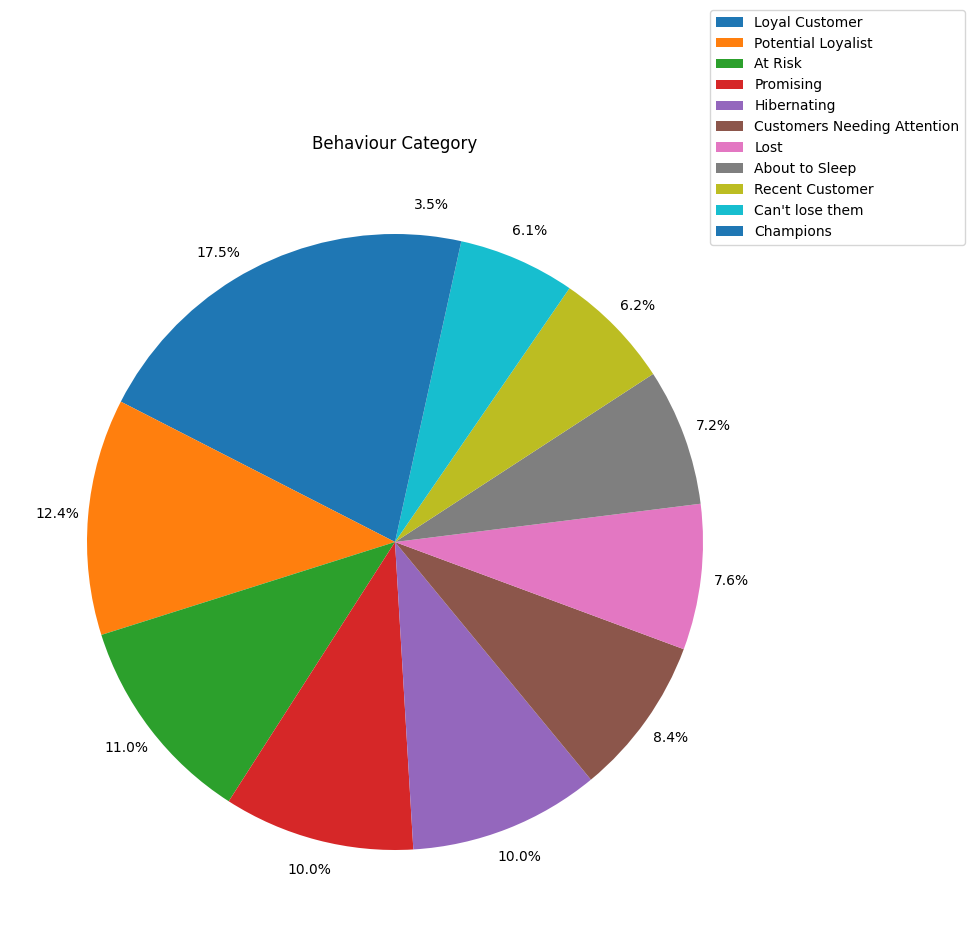

In [16]:
# Show Pie Chart of behaviour_category
plt.figure(figsize=(10, 10))
value_counts = df['behaviour_category'].value_counts()
patches, texts, autotexts = plt.pie(value_counts, autopct='%1.1f%%', startangle=90, pctdistance=1.1)

# Move the legend to the top left corner
plt.legend(patches, value_counts.index, loc="upper left", bbox_to_anchor=(0.9, 1.2))

# Set the title
plt.title('Behaviour Category')

# Show the plot
plt.show()

Definisikan Karakteristik Konsumen Berdasarkan Kelompok-nya

In [17]:
# Group By Behaviour_Score_Category,Income_Category,Age_Category Based On Average mnttotal and average totalpurchases
result = df.groupby(['behaviour_category', 'categorical_income', 'categorical_age', 'maritalstatus', 'education']).agg(
    Number_of_Customers=pd.NamedAgg(column='age', aggfunc='count'),
    Average_Spending=pd.NamedAgg(column='mnttotal', aggfunc='mean'),
    Average_Purchases=pd.NamedAgg(column='totalpurchases', aggfunc='mean'),
    # You can add more columns here for more insights
)

result = result.sort_values(by=['behaviour_category', 'Number_of_Customers'], ascending=[True, False]).groupby(['behaviour_category']).head(1)
result.sort_values(by=['Number_of_Customers'], ascending=False)   

,,,,,Number_of_Customers,Average_Spending,Average_Purchases
behaviour_category,categorical_income,categorical_age,maritalstatus,education,,,
Loyal Customer,Highest,36-55,Partner,Graduation,38,1236.157895,21.157895
Promising,Lowest,36-55,Partner,Graduation,25,48.680000,7.040000
Can't lose them,Highest,36-55,Partner,Graduation,19,1412.368421,22.578947
Potential Loyalist,High,36-55,Partner,Graduation,19,389.736842,13.789474
About to Sleep,Lowest,36-55,Partner,Graduation,18,47.055556,7.000000
Recent Customer,Lowest,36-55,Partner,Graduation,18,46.222222,6.500000
At Risk,High,36-55,Partner,Graduation,17,908.823529,23.588235
Hibernating,High,36-55,Partner,Graduation,16,628.625000,18.062500
Lost,Lowest,36-55,Partner,Graduation,16,43.562500,6.500000


Kebanyakan Orang Yang Beli Adalah Orang yang Sudah Menikah dan berpendidikan Sarjana

In [18]:
# Group By Behaviour_Score_Category Based On Average mntwines, average mntfruits, average mntmeatproducts, average mntfishproducts, average mntsweetproducts, average mntgoldproducts
result = df.groupby(['behaviour_category']).agg(
    Average_Spending_Wines=pd.NamedAgg(column='mntwines', aggfunc='mean'),
    Average_Spending_Fruits=pd.NamedAgg(column='mntfruits', aggfunc='mean'),
    Average_Spending_Meat_Products=pd.NamedAgg(column='mntmeatproducts', aggfunc='mean'),
    Average_Spending_Fish_Products=pd.NamedAgg(column='mntfishproducts', aggfunc='mean'),
    Average_Spending_Sweet_Products=pd.NamedAgg(column='mntsweetproducts', aggfunc='mean'),
    Average_Spending_Gold_Products=pd.NamedAgg(column='mntgoldproducts', aggfunc='mean'),
    # You can add more columns here for more insights
)

result.sort_values(by=['Average_Spending_Wines'], ascending=False)

,Average_Spending_Wines,Average_Spending_Fruits,Average_Spending_Meat_Products,Average_Spending_Fish_Products,Average_Spending_Sweet_Products,Average_Spending_Gold_Products
behaviour_category,,,,,,
Champions,815.591549,47.633803,372.267606,61.577465,42.873239,65.774648
Can't lose them,733.015873,47.690476,370.388889,68.142857,45.984127,67.865079
At Risk,619.246696,40.070485,299.762115,61.920705,43.533040,66.929515
Loyal Customer,564.883008,40.309192,291.281337,61.181058,40.802228,63.331476
Hibernating,241.087379,19.601942,121.257282,27.247573,20.762136,41.669903
Potential Loyalist,167.643137,13.074510,77.882353,19.337255,13.125490,36.133333
Customers Needing Attention,141.668605,13.058140,69.308140,18.941860,12.087209,35.290698
Recent Customer,19.476562,3.687500,12.140625,4.929688,3.578125,11.015625
Lost,18.420382,2.732484,12.866242,4.133758,3.343949,9.439490


Champions Spend Paling Banyak Ke Wines Dan Meat Products<br>
Can't Lose Them Spend Paling Banyak Ke Fruit, Ikan, Manisan, Dan Emas

Bisa Terlihat Juga Bahwa Orang yang Berada Di Peringkat 2 dan 3 Adalah Orang yang Golongan Tidak Sering Belanja di Toko <br>
Tetapi Berpotensi Untuk Membeli Barang yang Mahal

In [19]:
# Tunjukkan data identitas rata2 pelanggan untuk behaviour_category Can't lose them dan At Risk
result = df.groupby(['behaviour_category']).agg(
    Average_Age=pd.NamedAgg(column='age', aggfunc='mean'),
    Average_Income=pd.NamedAgg(column='income', aggfunc='mean'),
    Average_Kidhome=pd.NamedAgg(column='kidhome', aggfunc='mean'),
    Average_Teenhome=pd.NamedAgg(column='teenhome', aggfunc='mean'),
    Average_Total_Child=pd.NamedAgg(column='totalchild', aggfunc='mean'),
    # You can add more columns here for more insights
)

result.loc[['Can\'t lose them', 'At Risk']]

,Average_Age,Average_Income,Average_Kidhome,Average_Teenhome,Average_Total_Child
behaviour_category,,,,,
Can't lose them,47.492063,72946.023810,0.119048,0.444444,0.563492
At Risk,49.074890,69156.323789,0.096916,0.488987,0.585903


### _**Average Amount Per Transaction Analysis**_

- `average_spending`

In [20]:
# add new column average_spending based on mnttotal and totalpurchases
df.insert(42, 'average_spending', df['mnttotal'] / df['totalpurchases'])
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases,totalpurchases_category,behaviour_score,behaviour_category,average_spending,acceptedcmp1,acceptedcmp1_category,acceptedcmp2,acceptedcmp2_category,acceptedcmp3,acceptedcmp3_category,acceptedcmp4,acceptedcmp4_category,acceptedcmp5,acceptedcmp5_category,complain,response,response_category,totalacceptedcmp
0,13656,1957,58,56-90,Graduation,Single,58138.0,High,0,0,0,2012-09-04,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,81,61-100,88,81-150,1551,5,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,25,4,245,At Risk,62.04,0,Reject,0,Reject,0,Reject,0,Reject,0,Reject,0,1,Accept,1


- `All Online Transaction`

In [21]:
# add new column total_online_purchases which is the sum of numwebpurchases and numcatalogpurchases
df.insert(38, 'totalpurchases_online', df['numwebpurchases'] + df['numcatalogpurchases'])

- `All Offline Transaction` 

In [22]:
# add new column total_offline_purchases which is the sum of numdealspurchases and numstorepurchases
df.insert(39, 'totalpurchases_offline', df['numdealspurchases'] + df['numstorepurchases'])
df.head(1)

,id,yearbirth,age,categorical_age,education,maritalstatus,income,categorical_income,kidhome,teenhome,totalchild,dtcustomer,recency,recency_category,mntwines,mntwines_category,mntfruits,mntfruits_category,mntmeatproducts,mntmeatproducts_category,mntfishproducts,mntfishproducts_category,mntsweetproducts,mntsweetproducts_category,mntgoldproducts,mntgoldproducts_category,mnttotal,mnttotal_category,numdealspurchases,numdealspurchases_category,numwebpurchases,numwebpurchases_category,numcatalogpurchases,numcatalogpurchases_category,numstorepurchases,numstorepurchases_category,numwebvisitsmonth,numwebvisitsmonth_category,totalpurchases_online,totalpurchases_offline,totalpurchases,totalpurchases_category,behaviour_score,behaviour_category,average_spending,acceptedcmp1,acceptedcmp1_category,acceptedcmp2,acceptedcmp2_category,acceptedcmp3,acceptedcmp3_category,acceptedcmp4,acceptedcmp4_category,acceptedcmp5,acceptedcmp5_category,complain,response,response_category,totalacceptedcmp
0,13656,1957,58,56-90,Graduation,Single,58138.0,High,0,0,0,2012-09-04,58,2,635,501-1250,81,51-100,546,251-600,120,81-150,81,61-100,88,81-150,1551,5,3,2-4,8,7-15,10,7-12,4,4-8,7,4-8,18,7,25,4,245,At Risk,62.04,0,Reject,0,Reject,0,Reject,0,Reject,0,Reject,0,1,Accept,1


- `Average Amount Per Transaction (Monthly)`

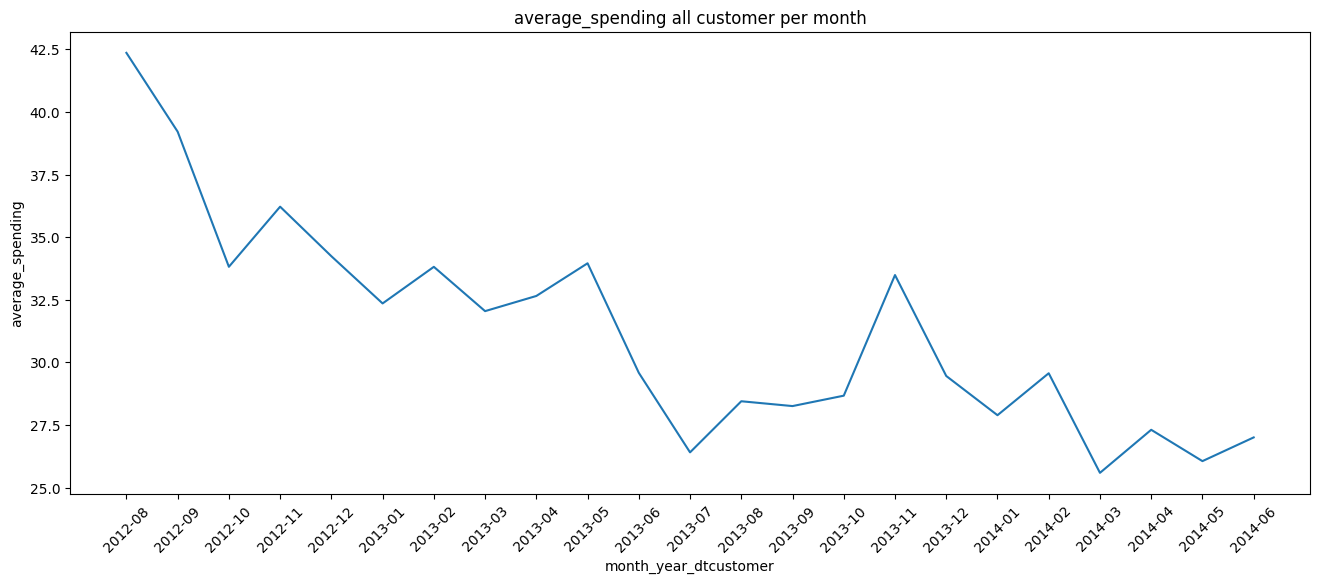

In [23]:
df['dtcustomer'] = pd.to_datetime(df['dtcustomer'], format='%Y-%m-%d')

# add new column month_year_dtcustomer which is the month and year of dtcustomer column
df.insert(12, 'month_year_dtcustomer', df['dtcustomer'].dt.strftime('%Y-%m'))

# change the value of month_year_dtcustomer for data that has month_year_dtcustomer = 2012-07 to 2012-08
df.loc[df['month_year_dtcustomer'] == '2012-07', 'month_year_dtcustomer'] = '2012-08'

# sort the month_year_dtcustomer column in ascending order
df = df.sort_values('month_year_dtcustomer')

# show plot of month_year_dtcustomer with average of mnttotal
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='month_year_dtcustomer', y='average_spending', ci=None)
plt.xticks(rotation=45)
plt.title('average_spending all customer per month')
plt.show()

Average Spending Per Transaction Lama Kelamaan Semakin Menurun <br><br>

Coba Kalau Dilihat Dari Groupnya

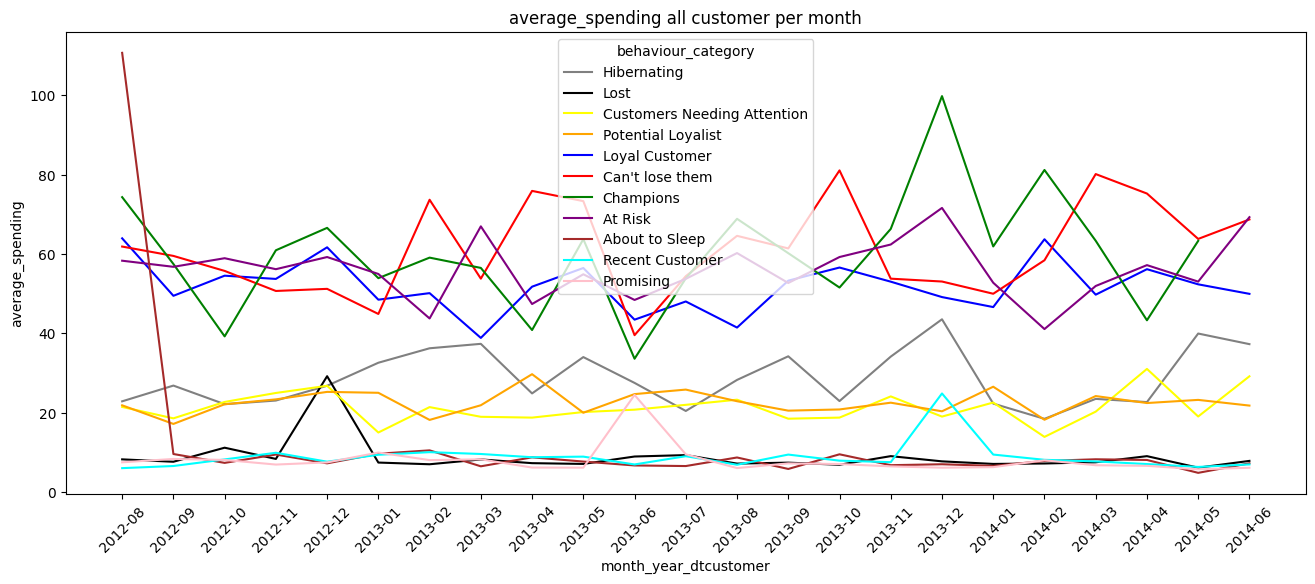

In [24]:
# Define a custom color palette
custom_palette = {'Can\'t lose them': 'red', 'Champions': 'green', 'Loyal Customer': 'blue', 'Potential Loyalist': 'orange', 'At Risk': 'purple', 'Hibernating': 'gray', 'About to Sleep': 'brown', 'Promising': 'pink', 'Lost': 'black', 'Customers Needing Attention': 'yellow', 'Recent Customer': 'cyan'}

# sort the month_year_dtcustomer column in ascending order
df = df.sort_values('month_year_dtcustomer')

# show plot of month_year_dtcustomer with average of mnttotal
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='month_year_dtcustomer', y='average_spending', hue='behaviour_category', ci=None, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('average_spending all customer per month')
plt.show()

### _**Customer Retention Analysis**_

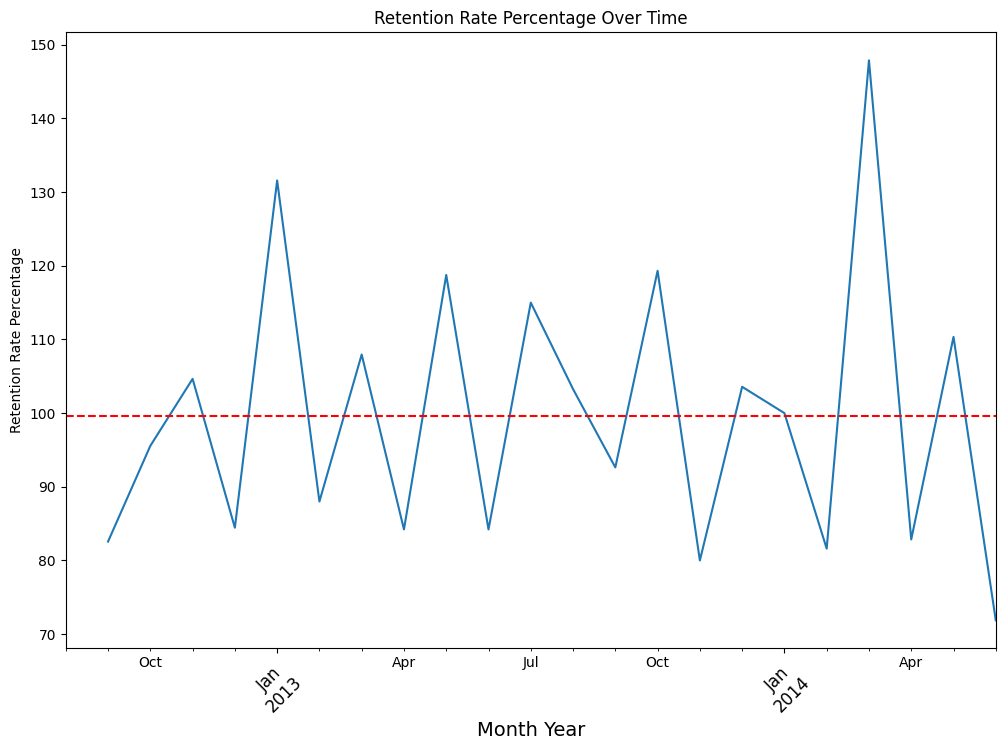

In [25]:
# Assuming 'month_year_dtcustomer' is properly formatted as a datetime object
df['month_year_dtcustomer'] = pd.to_datetime(df['month_year_dtcustomer'])

# Group By Month Year Based On Number of Customers
result = df.groupby('month_year_dtcustomer').agg(
    Number_of_Customers=('id', 'nunique'),
    Average_Spending=('mnttotal', 'mean'),
    Average_Purchases=('totalpurchases', 'mean')
)

# Calculate the retention rate percentage
result['Retention_Rate'] = (result['Number_of_Customers'] / result['Number_of_Customers'].shift(1)) * 100

# Calculate the mean retention rate
mean_retention_rate = result['Retention_Rate'].mean()

# Plot the retention rate percentage and the mean retention rate
ax = result['Retention_Rate'].plot(figsize=(12, 8))
ax.axhline(mean_retention_rate, color='red', linestyle='--')
plt.title('Retention Rate Percentage Over Time')
plt.xlabel('Month Year', fontsize=14)
plt.ylabel('Retention Rate Percentage')
plt.xticks(fontsize=12, rotation=45)
plt.show()

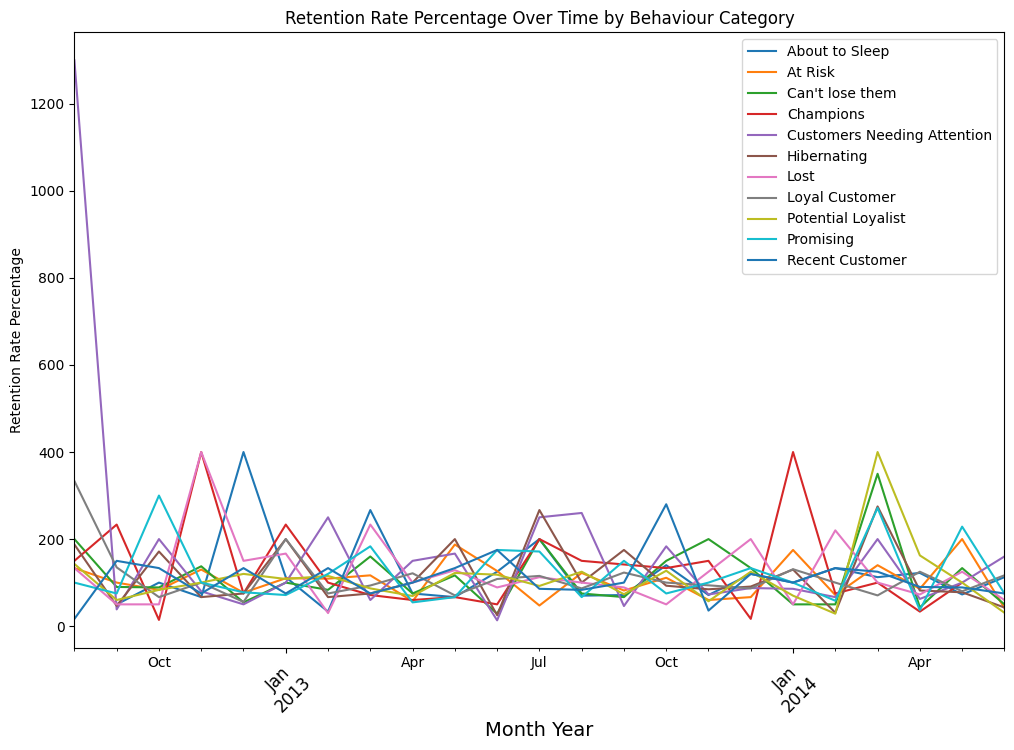

In [26]:
# Assuming 'month_year_dtcustomer' is properly formatted as a datetime object
df['month_year_dtcustomer'] = pd.to_datetime(df['month_year_dtcustomer'])

# Group By Behaviour_Score_Category and Month Year Based On Number of Customers
result = df.groupby(['behaviour_category', 'month_year_dtcustomer']).agg(
    Number_of_Customers=pd.NamedAgg(column='id', aggfunc='nunique'),
    Average_Spending=pd.NamedAgg(column='mnttotal', aggfunc='mean'),
    Average_Purchases=pd.NamedAgg(column='totalpurchases', aggfunc='mean')
)

# Calculate the retention rate percentage
result['Retention_Rate'] = (result['Number_of_Customers'] / result['Number_of_Customers'].shift(1)) * 100

# Plot the retention rate percentage for each behaviour category
for behaviour_category in result.index.get_level_values('behaviour_category').unique():
    result.loc[behaviour_category]['Retention_Rate'].plot(figsize=(12, 8), label=behaviour_category)

plt.title('Retention Rate Percentage Over Time by Behaviour Category')
plt.xlabel('Month Year', fontsize=14)
plt.ylabel('Retention Rate Percentage')
plt.xticks(fontsize=12, rotation=45)
plt.legend()
plt.show()

### _**Cart Waiver (Pembiaran Keranjang) Analysis**_

- `spending_waiver_online`

In [27]:
# add spending_waiver_online column based on numwebpurchases+numcatalogpurchases/webvisitsmonth*100
spending_waiver_online = ((df['totalpurchases_online'] / df['numwebvisitsmonth']))
df.insert(57, 'spending_waiver_online', np.nan_to_num(spending_waiver_online, nan=0, posinf=0, neginf=0))

- `spending_waiver_online_category`

In [28]:
# add spending_waiver_online_category segments based on quartiles
df.insert(58, 'spending_waiver_online_category', pd.qcut(df['spending_waiver_online'], q=5, labels=[1, 2, 3, 4, 5]))

- `spending_waiver_offline`

In [29]:
# add spending_waiver_online column based on numwebpurchases+numcatalogpurchases/webvisitsmonth*100
spending_waiver_offline = (df['totalpurchases_offline'] / df['recency'])
df.insert(59, 'spending_waiver_offline', np.nan_to_num(spending_waiver_offline, nan=0, posinf=0, neginf=0))

- `spending_waiver_offline_category`

In [30]:
# add spending_waiver_offline_category segments based on quartiles
df.insert(60, 'spending_waiver_offline_category', pd.qcut(df['spending_waiver_offline'], q=5, labels=[1, 2, 3, 4, 5]))

- `spending_waiver_total`

In [31]:
# add spending_waiver column based on spending_waiver_online_category and spending_waiver_offline_category
df.insert(61, 'spending_waiver_total', df['spending_waiver_online_category'].astype(str) + df['spending_waiver_offline_category'].astype(str))

- `spending_waiver_total_category`

In [32]:
# add spending_waiver_category segments based on spending_waiver_total
df.insert(62, 'spending_waiver_total_category', df['spending_waiver_total'].replace({
    '55': 'Both Care','54': 'Both Care','53': 'Online But Offline Still Fine','52': 'Online Recommended But Still Offline Sometime','51': 'Online Only',
    '45': 'Both Care','44': 'Both Care','43': 'Online But Offline Still Fine','42': 'Online Recommended But Still Offline Sometime','41': 'Online Only',
    '35': 'Offline But Online Still Fine','34': 'Offline But Online Still Fine','33': 'Mid','32': 'Online Recommended But Still Offline Sometime','31': 'Online Only',
    '25': 'Offline Recommended But Online Still Fine','24': 'Offline Recommended But Online Still Fine','23': 'Offline Recommended But Online Still Fine','22': 'Not Care Much','21': 'Not Care But Online Prefered',
    '15': 'Offline Only','14': 'Offline Only','13': 'Offline Only','12': 'Not Care But Offline Prefered','11': 'Not Care At All',
}))

Pengabaian Keranjang Ini Menggunakan Skala 1-5<br><br>
Semakin Tinggi Nilai-nya Semakin Rendah Pengabaian Keranjangnya

Result

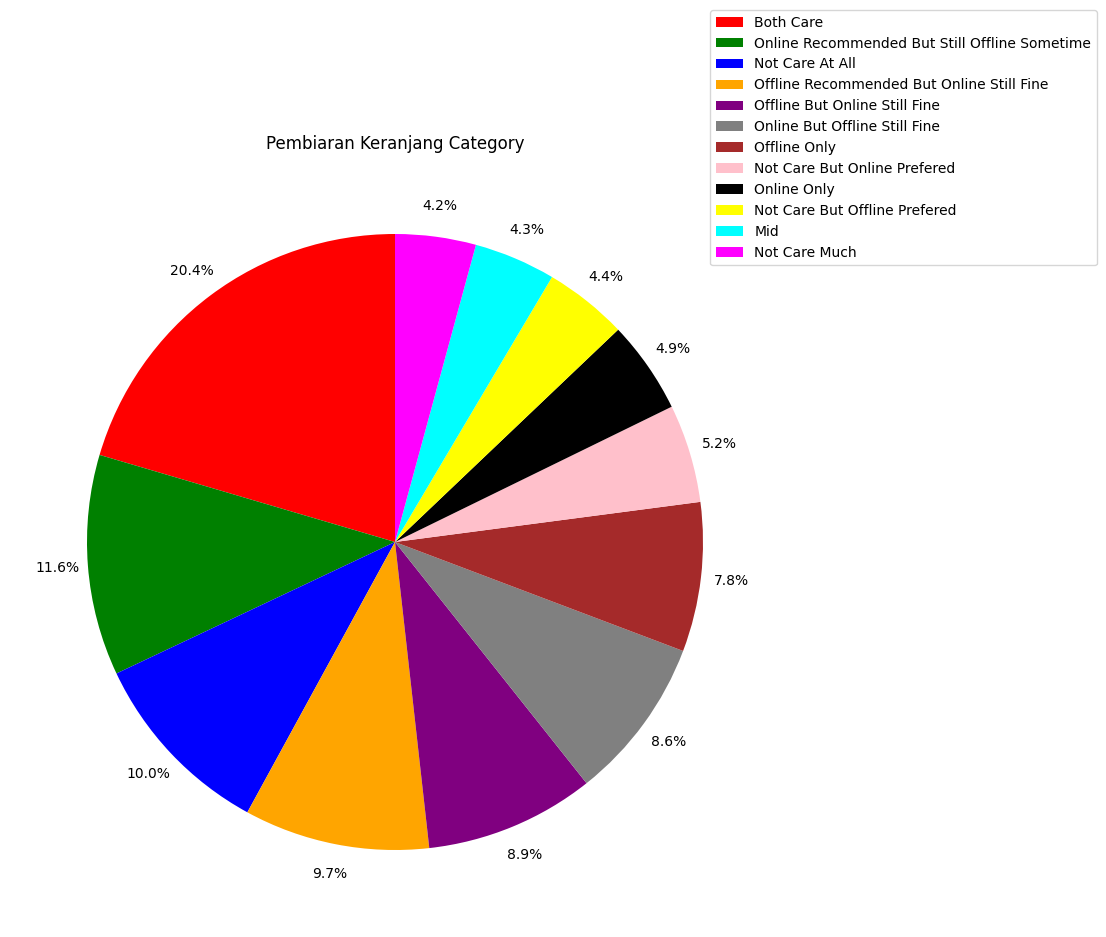

In [33]:
# Define a custom list of colors
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'brown', 'pink', 'black', 'yellow', 'cyan', 'magenta']

# Show Pie Chart of spending_waiver_category
plt.figure(figsize=(10, 10))
value_counts = df['spending_waiver_total_category'].value_counts()
patches, texts, autotexts = plt.pie(value_counts, autopct='%1.1f%%', startangle=90, pctdistance=1.1, colors=custom_colors)

# Move the legend to the top left corner
plt.legend(patches, value_counts.index, loc="upper left", bbox_to_anchor=(0.9, 1.2))

# Set the title
plt.title('Pembiaran Keranjang Category')

# Show the plot
plt.show()

In [34]:
# Show Percentange Where spending_waiver_total_category = "Both Care", "Online But Offline Still Fine", "Online Recommended But Still Offline Sometime", "Online Only", "Not Care But Online Prefered", "Mid"
df.loc[df['spending_waiver_total_category'].isin(['Both Care', 'Online But Offline Still Fine', 'Online Recommended But Still Offline Sometime', 'Online Only', 'Not Care But Online Prefered', 'Mid'])].shape[0] / df.shape[0] * 100

54.89051094890512

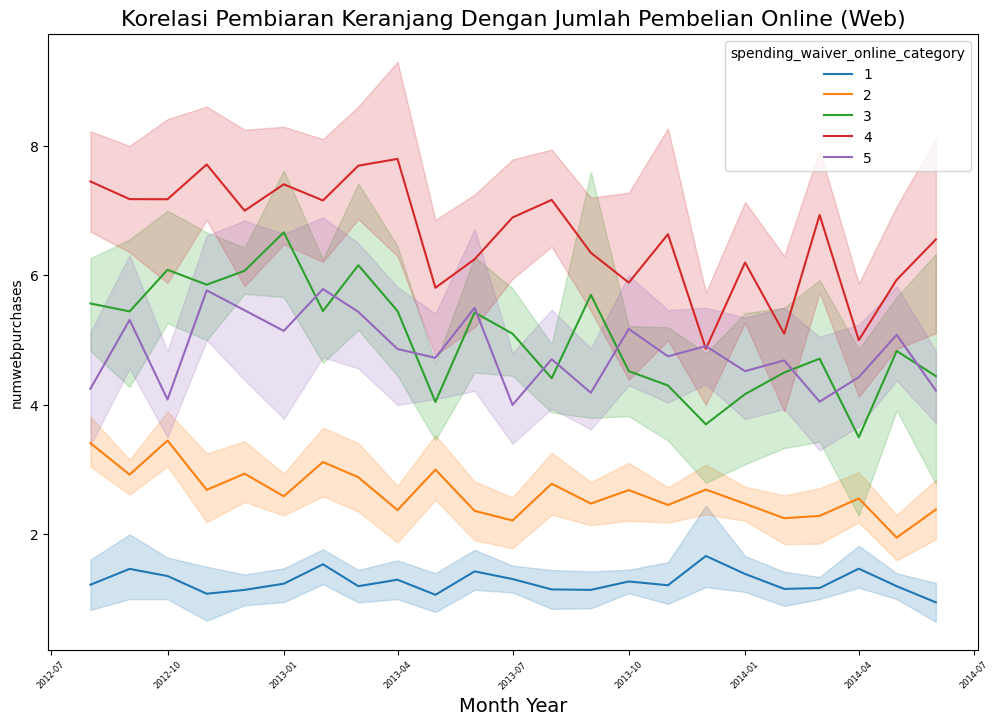

In [35]:
# Show Line Plot of customer count for each month
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='month_year_dtcustomer', y='numwebpurchases', hue='spending_waiver_online_category', data=df)
ax.set_xlabel('Month Year', fontsize=14)
plt.title('Korelasi Pembiaran Keranjang Dengan Jumlah Pembelian Online (Web)', fontsize=16)

# Set the font size of the x-axis tick labels
plt.xticks(fontsize=6, rotation=45)

plt.show()

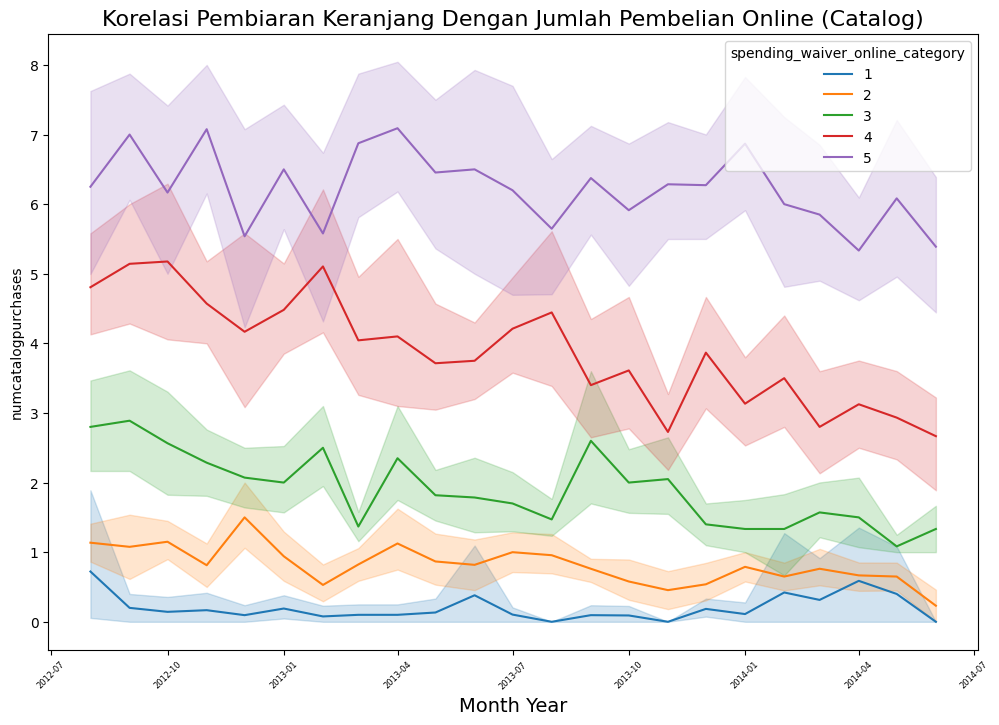

In [36]:
# Show Line Plot of customer count for each month
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='month_year_dtcustomer', y='numcatalogpurchases', hue='spending_waiver_online_category', data=df)
ax.set_xlabel('Month Year', fontsize=14)
plt.title('Korelasi Pembiaran Keranjang Dengan Jumlah Pembelian Online (Catalog)', fontsize=16)

# Set the font size of the x-axis tick labels
plt.xticks(fontsize=6, rotation=45)

plt.show()

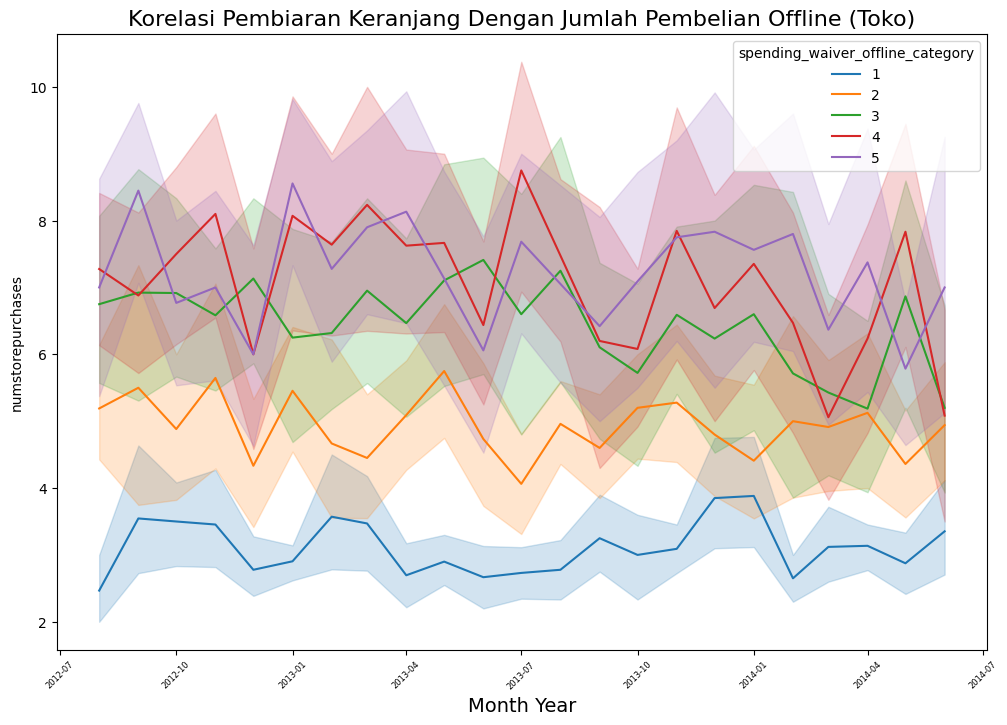

In [37]:
# Show Line Plot of customer count for each month
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='month_year_dtcustomer', y='numstorepurchases', hue='spending_waiver_offline_category', data=df)
ax.set_xlabel('Month Year', fontsize=14)
plt.title('Korelasi Pembiaran Keranjang Dengan Jumlah Pembelian Offline (Toko)', fontsize=16)

# Set the font size of the x-axis tick labels
plt.xticks(fontsize=6, rotation=45)

plt.show()

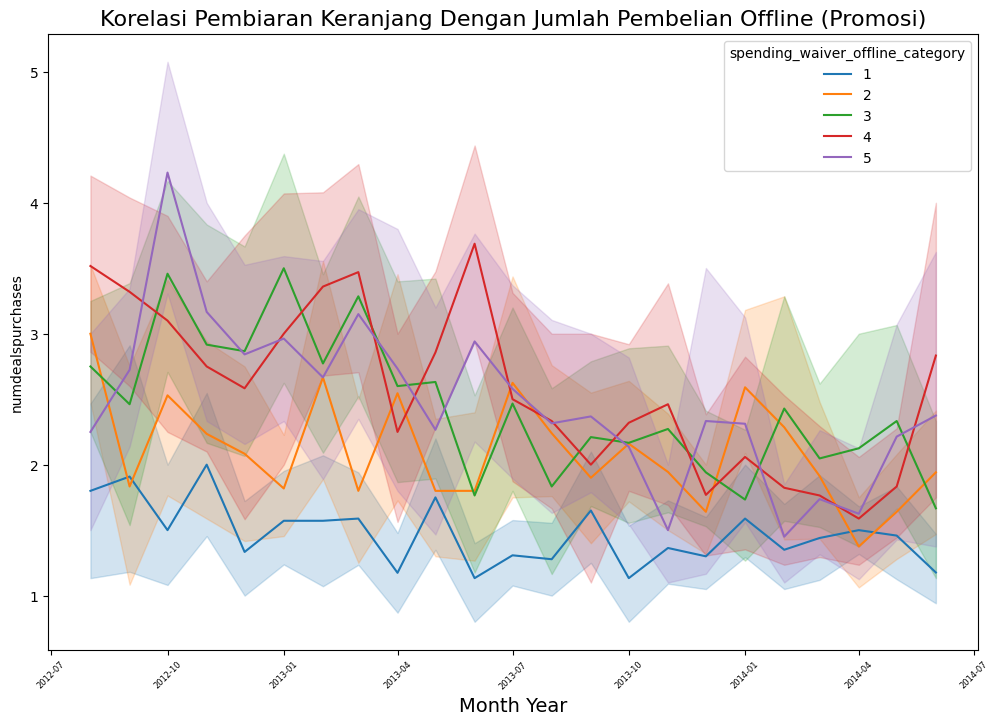

In [38]:
# Show Line Plot of customer count for each month
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='month_year_dtcustomer', y='numdealspurchases', hue='spending_waiver_offline_category', data=df)
ax.set_xlabel('Month Year', fontsize=14)
plt.title('Korelasi Pembiaran Keranjang Dengan Jumlah Pembelian Offline (Promosi)', fontsize=16)

# Set the font size of the x-axis tick labels
plt.xticks(fontsize=6, rotation=45)

plt.show()

In [40]:
df['behaviour_category'].value_counts()

behaviour_category
Loyal Customer                 359
Potential Loyalist             255
At Risk                        227
Hibernating                    206
Promising                      206
Customers Needing Attention    172
Lost                           157
About to Sleep                 148
Recent Customer                128
Can't lose them                126
Champions                       71
Name: count, dtype: int64

### _**Insight**_

Dari analisis data yang cermat, terpancar kejelasan bahwa:

1. Komunitas yang paling aktif dalam berbelanja adalah mereka yang telah menikah dan memiliki latar belakang pendidikan tinggi, menandakan adanya potensi besar dalam segmen pasar ini.
2. Strategi pemasaran melalui katalog telah berhasil menarik minat dari mereka yang sebelumnya jarang berbelanja, menggambarkan potensi pertumbuhan yang menjanjikan melalui pendekatan pemasaran yang tepat.
3. Dalam era digital, lebih dari setengah pembeli online merupakan mereka yang belum terbiasa dengan kegiatan belanja secara rutin, menyoroti peluang besar untuk menjangkau konsumen baru melalui platform online.
4. Meskipun fluktuasi pelanggan terjadi dari waktu ke waktu, kemampuan perusahaan untuk mempertahankan retensi pelanggan menunjukkan keunggulan kompetitif yang kuat dan konsistensi dalam pelayanan yang diberikan.

### _**Recommendation**_


Berdasarkan hasil analisis data yang disajikan, beberapa rekomendasi strategis yang dapat diberikan kepada perusahaan untuk meningkatkan kinerja mereka adalah sebagai berikut:

1. Pengembangan Program Pemasaran Khusus: Fokus pada pemasaran yang mengarah kepada pasangan yang sudah menikah dan individu dengan latar belakang pendidikan sarjana. Perusahaan dapat mengembangkan kampanye yang berfokus pada nilai-nilai keluarga, kualitas produk, dan kemewahan untuk menarik kelompok demografis ini.

2. Perluasan Strategi Pemasaran Katalog: Meningkatkan penawaran katalog dan pemasaran yang berfokus pada kemudahan dan kenyamanan berbelanja. Perusahaan sebaiknya juga mempertimbangkan untuk menargetkan lebih banyak orang yang awalnya tidak sering berbelanja melalui strategi pemasaran yang lebih agresif dan penawaran khusus.

3. Peningkatan Pengalaman Berbelanja Online: Memperhatikan bahwa sebagian besar pembeli online adalah mereka yang tidak sering berbelanja, perusahaan harus memastikan pengalaman berbelanja online yang mulus dan mudah dipahami. Ini bisa meliputi penyederhanaan proses pembayaran, peningkatan keamanan transaksi, serta peningkatan layanan pelanggan untuk memastikan kepuasan pelanggan.

4. Analisis dan Pemahaman Lebih Mendalam tentang Pola Retensi Pelanggan: Perusahaan harus melakukan analisis mendalam terkait faktor-faktor yang menyebabkan retensi pelanggan, terutama saat terjadi fluktuasi pelanggan. Dengan memahami pola dan kebutuhan pelanggan, perusahaan dapat mengembangkan strategi retensi pelanggan yang efektif, seperti program loyalitas, peningkatan kualitas layanan, dan peningkatan nilai produk.

5. Peningkatan Komunikasi dengan Pelanggan: Meningkatkan interaksi dan komunikasi dengan pelanggan dapat membantu membangun hubungan yang lebih kuat. Ini bisa berupa penggunaan email, media sosial, atau survei untuk mendapatkan umpan balik pelanggan secara teratur. Dengan demikian, perusahaan dapat terus menyesuaikan strategi mereka sesuai dengan umpan balik dan kebutuhan pelanggan.

Dengan mengimplementasikan rekomendasi ini, perusahaan diharapkan dapat meningkatkan retensi pelanggan, menarik lebih banyak pembeli potensial, dan memperkuat posisi mereka dalam pasar.

In [39]:
df.to_csv('../src/data/clean/Supermarket Customers Finish.csv', index=False)